# 02. 텍스트 전처리(Text preprocessing)

## 02-01 토큰화(Tokenization)

### 1. 단어 토큰화(Word Tokenization)
- 입력: Time is an illusion. Lunchtime double so!
- 결과: "Time", "is", "an", "illustion", "Lunchtime", "double", "so"

### 2. 토큰화 중 생기는 선택의 순간
- 예를 들어 영어권 언어에서 아포스트로피를(')가 들어가있는 단어는 어떻게 토큰으로 분류해야 하는지에 대한 선택의 문제
  - Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
  - 여기서 don't를 don't로 할것인지 don t로 할것인지 dont로 할것인지 do n't로 할것인지
- NLTK는 영어 코퍼스를 토큰화하기 위한 도구들을 제공

In [1]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [2]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [3]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [4]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 3. 토큰화에서 고려해야할 사항

#### 1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.
- 구두점도 하나의 토큰으로 분류하기도 함
  - ex) 마침표와 같은 경우 문장의 경계를 알 수 있는데 도움이 되므로 단어를 뽑아낼 때 제외하지 않을 수 있음
- 단어 자체에 구두점을 가지고 있는 경우도 있음
  - Ph.D AT&T 4.5 123,456,789
  
#### 2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.
- 줄임말
  - what're = what are, we're = we are
  - 접어(clitic): 줄인말, 위의 예에서 re
- 단어 내에 띄어쓰기
  - New York, rock 'n' roll 등
  
#### 3) 표준 토큰화 예제
- Penn Treebank Tokenization의 규칙
  - 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
  - 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [5]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


### 4. 문장 토큰화(Sentence Tokenization)
- 토큰의 단위가 문장(sentence)일 경우
- ?, ?, .으로 구분 불가
- !나 ?는 문장의 구분을 위한 꽤 명확한 구분자(boundary) 역할을 하지만 마침표는 그렇지 않기 때문.
  - EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.
  - EX2) Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.

In [6]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [7]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [8]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


### 5. 한국어에서의 토큰화의 어려움

#### 1) 교착어의 특성
- 조사의 존재
- 형태소(morpheme): 뜻을 가진 가장 작은 말의 단위
  - 자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
  - 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간를 말한다.
  - ex) 에디가 책을 읽었다
  - 띄어쓰기 단위 토큰화: ['에디가', '책을', '읽었다']
  - 형태소 단위 토큰화: 에디, 책(자립 형태소), -가, -을, 읽-, -었, -다 (의존 형태소)
  
#### 2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.
- 결론적으로 한국어는 수많은 코퍼스에서 띄어쓰기가 무시되는 경우가 많아 자연어 처리가 어려워졌다

### 6. 품사 태깅(Part-of-speech tagging)
- 단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라짐
- 그에 따라 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데, 이 작업을 품사 태깅(part-of-speech tagging)이라고 합니다.

### 7. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :',tokenized_sentence)
print('품사 태깅 :',pos_tag(tokenized_sentence))

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


In [10]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [11]:
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


- Okt 형태소 분석기 결과 != 꼬꼬마 형태소 분석기 결과
- 선택하고자 하는 필요 용도에 어떤 것이 제일 적합한지 판단하고 사용
  - ex) 속도 중시 -> 메캅

- 따라하다가 안될때: https://uyt8989.tistory.com/124 따라하기

## 02-02 정제(Cleaning) and 정규화(Normalization)
- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

### 1. 규칙에 기반한 표기가 다른 단어들의 통합
- USA와 US는 같은 의미를 가지므로 하나의 단어로 정규화

### 2. 대, 소문자 통합
-  대문자와 소문자를 무작정 통합해서는 안 됨
  - 미국을 뜻하는 단어 US와 우리를 뜻하는 us
  
### 3. 불필요한 단어의 제거
#### 1) 등장 빈도가 적은 단어
#### 2) 길이가 짧은 단어
- 영어에서는 1글자, 2글자로 된 단어를 제거하면 불용어 제거가 많이 되는 효과 있음

In [12]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


### 4. 정규 표현식(Regular Expression)
- 정규 표현식은 이러한 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거하는 방식으로서 매우 유용

## 02-03 어간 추출(Stemming) and 표제어 추출(Lemmatization)

### 1. 표제어 추출(Lemmatization)
- 표제어: 기본 사전형 단어
- 형태학적 파싱: 어간과 접사를 분리하는 작업

In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


- 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력
- 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문

In [14]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [15]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [16]:
lemmatizer.lemmatize('has', 'v')

'have'

### 2. 어간 추출(Stemming)
- 어간 추출: 형태학적 분석을 단순화한 버전

In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


- 규칙 기반의 접근 -> 사전에 없는 단어도 포함되어있음
  - @@@@alize -> @@@@al
  - @@@@ance -> @@@@
  - @@@@ical -> @@@@ic

In [18]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


- 어간 추출 속도 >>>> 표제어 추출 속도
- 포터 어간 추출기: 정밀하게 설계, 영어 자연어 처리에서 가장 준수한 선택
- NLTK에서는 포터 알고리즘 외에 랭커스터 스태머 알고리즘 지원

In [19]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


- 서로 다른 알고리즘 사용하여 결과가 전혀 다름
- 어떤 스태머가 해당 코퍼스에 적합한지 판단한 후 사용해야함
- 어간 추출은 일반화가 지나치게 되거나 또는 덜되거나 하는 경우가 있음
  - ex) organization -어간추출-> organ (organ과 organization은 전혀 다름)
- 표제어 추출과 어간 추출 차이  
  - Stemming
    - am → am
    - the going → the go
    - having → hav
  - Lemmatization
    - am → be
    - the going → the going
    - having → have
    
### 3. 한국어에서의 어간 추출
- 5언 9품: 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 관계언(조사), 독립언(감탄사), 용언(동사, 형용사)
- 이 중 용언은 어간과 어미의 결합으로 구성

#### (1) 활용(conjugation)
- 활용: 용언의 어간(stem)이 어미(ending)를 가지는 일
- 어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분
- 어미(ending): 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분

#### (2) 규칙 활용
- 규칙 활용: 어간이 어미를 취할 때, 어간의 모습이 일정

#### (3) 불규칙 활용
- 불규칙 활용: 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우
  - 어간이 달라지는 경우: 듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-
  - 어미가 달라지는 경우: 오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러

## 02-04 불용어(Stopword)

- 큰 의미가 없는 단어 토큰을 제거하는 작업 필요
- 불용어: 조사, 접미사 같은 문장에는 자주 등장하나 실제 의미분석을 하는데는 기여 없는 단어들

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

### 1. NLTK에서 불용어 확인하기

In [21]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


- NLTK가 정의한 100개 이상의 불용어 중에 10개

### 2. NLTK를 통해서 불용어 제거하기

In [22]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


- 'is', 'not', 'an'과 같은 단어들이 문장에서 제거

### 3. 한국어에서 불용어 제거하기
- 토큰화 후에 조사, 접속사 등을 제거하는 방법
- 그러나 결국 사용자가 직접 불용어 사전을 만들게 되는 경우가 많음

In [23]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


## 02-05 정규 표현식(Regular Expression)

### 1. 정규 표현식 문법과 모듈 함수

#### (1) 정규 표현식 문법

#### (2) 정규표현식 모듈 함수


### 2. 정규 표현식 실습

In [24]:
import re

#### (1) . 기호
- . 한 개의 임의의 문자를 나타냄

In [25]:
r = re.compile("a.c")
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [26]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

#### (2) ? 기호
- ?앞에 문자가 존재할 수도 있고 아닐 수도 있는 경우
  - ex) ab?c -> b가 있을 수도 있고 없을 수도 있고 -> ac, abc

In [27]:
r = re.compile("ab?c")
r.search("abbc") # 아무런 결과도 출력되지 않는다.

In [28]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [29]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

#### (3) * 기호
- 바로 앞의 문자가 0개 이상일 경우.
- 존재할수도 있고 여러개일수도 있고
  - ex) ab\*c -> b가 0개부터 무한대 -> ac, abc, abbc, ...

In [30]:
r = re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않는다.

In [31]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [32]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [33]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

#### (4) + 기호
- 바로 앞의 문자가 1개 이상일 경우.
- 하나일수도 있고 여러개일수도 있고
  - ex) ab+c -> b가 1개부터 무한대 -> abc, abbc, ...

In [34]:
r = re.compile("ab+c")
r.search("ac") # 아무런 결과도 출력되지 않는다.

In [35]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [36]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

#### (5) ^ 기호
- 시작되는 문자열 지정
  - ex) ^ab -> ab로 시작되는 경우 -> ab, abc, abd ....

In [37]:
r = re.compile("^ab")

# 아무런 결과도 출력되지 않는다.
r.search("bbc")
r.search("zab")

In [38]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

#### 6. {숫자} 기호
- 해당 문자를 숫자만큼 반복한것
  - ex) ab{2}c -> abbc

In [39]:
r = re.compile("ab{2}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbc")

In [40]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

#### 7. {숫자1, 숫자2} 기호
- 해당 문자를 숫자1 이상 숫자2 이하만큼 반복한것
  - ex) ab{2, 7}c -> abbc (b는 2개 이상 7개 이하 가능)

In [41]:
r = re.compile("ab{2,8}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbbbbbc")

In [42]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [43]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

#### 8. {숫자,} 기호
- 해당 문자를 숫자 이상만큼 반복한것
  - ex) ab{2,}c -> abbc, abbbc, abbbc...

In [44]:
r = re.compile("a{2,}bc")

# 아무런 결과도 출력되지 않는다.
r.search("bc")
r.search("aa")

In [45]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [46]:
r.search("aaaaaaaabc")

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

#### 9. [ ] 기호
- \[ \] 안의 문자들 중 한 개의 문자와 매치
  - ex) [A-Z] -> 대문자중 하나

In [47]:
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [48]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [49]:
r.search("aaaaaaa")

<re.Match object; span=(0, 1), match='a'>

In [50]:
r.search("baac")

<re.Match object; span=(0, 1), match='b'>

In [51]:
r = re.compile("[a-z]")

# 아무런 결과도 출력되지 않는다.
r.search("AAA")
r.search("111") 

In [52]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

#### 10. [^문자] 기호
- \[ \] 안의 문자 빼고 모든 문자와 매치
  - ex) [^abc] -> a 또는 b 또는 c빼고 -> d, ef, ghi

In [53]:
r = re.compile("[^abc]")

# 아무런 결과도 출력되지 않는다.
r.search("a")
r.search("ab") 
r.search("b")

In [54]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [55]:
r.search("1")

<re.Match object; span=(0, 1), match='1'>

### 3. 정규 표현식 모듈 함수 예제

#### (1) re.match()와 re.search()의 차이
- search()는 전체 match()는 처음부터 일치하는지 확인
- 문자열 중간에 일치하는 부분이 있더라도 match는 앞이 일치하지 않으면 확인X

In [56]:
r = re.compile("ab.")
r.match("kkkabc") # 아무런 결과도 출력되지 않는다.

In [57]:
r.search("kkkabc")

<re.Match object; span=(3, 6), match='abc'>

In [58]:
r.match("abckkk")

<re.Match object; span=(0, 3), match='abc'>

#### (2) re.split()

In [59]:
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [60]:
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [61]:
text = "사과+딸기+수박+메론+바나나"

print(re.split("\+", text))
print(text.split("+"))

['사과', '딸기', '수박', '메론', '바나나']
['사과', '딸기', '수박', '메론', '바나나']


#### (3) re.findall()
- 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴

In [62]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)

['010', '1234', '1234', '30']

In [63]:
re.findall("\d+", "문자열입니다.")

[]

#### (4) re.sub()
- 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체

In [64]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [65]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

### 4. 정규 표현식 텍스트 전처리 예제

In [66]:
re.split('\s+', text)  

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [67]:
re.findall('\d+',text)  

['100', '101', '102']

In [68]:
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [69]:
re.findall('[A-Z]{4}',text)  

['PROF', 'STUD', 'STUD']

In [70]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

### 5. 정규 표현식을 이용한 토큰화

In [71]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer("\s+", gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


## 02-06 정수 인코딩(Integer Encoding)

### 1. 정수 인코딩(Integer Encoding)

#### (1) dictionary 사용하기

In [72]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [73]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

In [74]:
sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [75]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []

    for word in tokenized_sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄인다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거한다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거한다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    preprocessed_sentences.append(result) 
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [76]:
print('단어 집합 :',vocab)

단어 집합 : {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [77]:
# 'barber'라는 단어의 빈도수 출력
print(vocab["barber"])

8


In [78]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [79]:
# 빈도수 높으면 낮은 정수 부여
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


- OOV (out of vocabulary): 단어 집합에 존재하지 않는 단어

In [80]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [81]:
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [82]:
encoded_sentences = []
for sentence in preprocessed_sentences:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


#### (2) Counter 사용하기

In [83]:
from collections import Counter

In [84]:
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [85]:
# words = np.hstack(preprocessed_sentences)으로도 수행 가능.
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [86]:
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [87]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [88]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [89]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


#### (3) NLTK의 FreqDist 사용하기

In [90]:
from nltk import FreqDist
import numpy as np

In [91]:
# np.hstack으로 문장 구분을 제거
vocab = FreqDist(np.hstack(preprocessed_sentences))

In [92]:
print(vocab["barber"]) # 'barber'라는 단어의 빈도수 출력

8


In [93]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [94]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [95]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력의 순서대로 0부터 인덱스를 부여함.
    print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


### 2. 케라스의 텍스트 전처리

In [96]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [97]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

- fit_on_texts: 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여
- 각 단어에 인덱스가 어떻게 부여되었는지를 보려면, word_index를 사용
- 각 단어가 카운트를 수행하였을 때 몇 개였는지를 보고자 한다면 word_counts를 사용

In [98]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [99]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


- texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환

In [100]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


- tokenizer = Tokenizer(num_words=숫자)와 같은 방법으로 빈도수가 높은 상위 몇 개의 단어만 사용하겠다고 지정

In [101]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

- +1 하는 이유: 1번부터 5번 단어까지 사용해야하기 때문에 0에는 단어를 지정하지 않는다. 후의 패딩이라는 작업때문

In [102]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [103]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [104]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


- 5개의 단어 사용한다고 설정한것은 texts_to_sequences에 적용됨

In [105]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

In [106]:
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] 

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [107]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

- 케라스 토크나이저는 oov의 인덱스를 1로 지정함

In [108]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


## 02-07 패딩(Padding)

### 1. Numpy로 패딩하기

In [109]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [110]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [111]:
# 단어 집합 만들고 정수 인코딩 수행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [112]:
# 동일한 길이로 맞추기 위해 가장 길이가 긴 문장 계산
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


In [113]:
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

- 패딩: 데이터에 특정 값을 채워서 데이터의 크기를 조정하는 것
- 패딩할때 숫자 0을 사용하면 제로 패딩

### 2. 케라스 전처리 도구로 패딩하기

In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [115]:
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [116]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

- Numpy와 달리 Karas는 앞을 0으로 채움
- 뒤에 채우고 싶으면 인자로 padding = 'post' 해야함

In [117]:
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [118]:
(padded == padded_np).all()

True

In [119]:
# maxlen에 길이의 제한을 주고 패딩할 수 있음
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

- maxlen에 길이의 제한을 주고 패딩 가능
- 길이보다 5보다 짧은 문서는 0으로 패딩되고 기존에 5보가 길었다면 데이터 손실
- 디폴트로는 앞에값 손실
- post를 주면 뒤에값 손실

In [120]:
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]])

In [121]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [122]:
# 패딩에 굳이 0 넣을필요 없음 단어와 안겹치지만 하면 됨
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

## 02-08 원-핫 인코딩(One-Hot Encoding)
- 단어 집합: **서로 다른 단어**들의 집합, 텍스트의 모든 단어를 중복을 허용하지 않고 모아놓은 것
- 원-핫 인코딩을 위해서는 먼저 단어 집합을 만들어야함

### 1. 원-핫 인코딩(One-Hot Encoding)이란?
- 원-핫 벡터(One-Hot vector): 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여
- 원-핫 인코딩 과정
  1. 정수 인코딩을 수행. 각 단어에 고유한 정수를 부여
  2. 표현하고 싶은 단어의 고유한 정수를 인덱스로 간주하고 해당 위치에 1을 부여, 다른 단어의 인덱스의 위치에는 0을 부여

In [123]:
from konlpy.tag import Okt  

okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


- 보통 빈도수 순으로 단어 정렬하여 정수 부여

In [124]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [125]:
def one_hot_encoding(word, word_to_index):
    one_hot_vector = [0]*(len(word_to_index))
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [126]:
# 자연어 라는 단어의 원-핫 벡터
one_hot_encoding("자연어", word_to_index)

[0, 0, 1, 0, 0, 0]

### 2. 케라스(Keras)를 이용한 원-핫 인코딩(One-Hot Encoding)
- 케라스는 to_categorical()를 지원

In [127]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [128]:
# 케라스 토크나이저를 이용한 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [129]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [130]:
# 케라스 정수 인코딩 결과로 원핫 인코딩 수행
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### 3. 원-핫 인코딩(One-Hot Encoding)의 한계

#### (1) 원-핫 인코딩 단점
- 단어의 개수가 늘어날 수록, 벡터를 저장하기 위해 필요한 공간이 계속 늘어남
  - 저장 공간 측면에서는 매우 비효율적인 표현 방법
- 원-핫 벡터는 단어의 유사도를 표현하지 못함
  - ex) 늑대([1,0,0,0]), 강아지([0,0,1,0]) 원핫벡터로는 유사성 표현 못함

#### (2) 원-핫 인코딩 단점의 해결책
- 카운트 기반의 벡터화: LSA(잠재 의미 분석), HAL 등
- 예측 기반으로 벡터화: NNLM, RNNLM, Word2Vec, FastText 등
- 카운트 기반과 예측 기반: GloVe

## 02-09 데이터의 분리(Splitting Data)

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### 1. 지도 학습(Supervised Learning)
- 지도 학습의 훈련 데이터는 정답이 무엇인지 맞춰 하는 '문제'에 해당되는 데이터와 레이블이라고 부르는 '정답'이 적혀있는 데이터로 구성
- 기계는 정답이 적혀져 있는 문제지를 문제와 정답을 함께 보면서 열심히 공부하고, 향후에 정답이 없는 문제에 대해서도 정답을 잘 예측해야 함

>**<훈련 데이터>**<br>
X_train : 문제지 데이터<br>
y_train : 문제지에 대한 정답 데이터.<br>
**<테스트 데이터>**<br>
X_test : 시험지 데이터.<br>
y_test : 시험지에 대한 정답 데이터.

### 2. X와 y분리하기
#### (1) zip 함수를 이용하여 분리하기
- zip()함수는 동일한 개수를 가지는 시퀀스 자료형에서 각 순서에 등장하는 원소들끼리 묶어줌

In [132]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [133]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


#### (2) 데이터프레임을 이용하여 분리하기

In [134]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [135]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [136]:
print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


#### (3) Numpy를 이용하여 분리하기
-  Numpy의 슬라이싱(slicing)을 사용하여 데이터를 분리

In [137]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [138]:
X = np_array[:, :3] # 마지막 열 제외하고 X 데이터 저장
y = np_array[:,3] # 마지막 열만 y 데이터 저장

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


### 3. 테스트 데이터 분리하기

#### (1) 사이킷 런을 이용하여 분리하기
- 사이킷런은 train_test_split()를 지원

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

- X : 독립 변수 데이터. (배열이나 데이터프레임)
- y : 종속 변수 데이터. 레이블 데이터.
- test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
- train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.
- random_state : 난수 시드

In [140]:
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [142]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [143]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


In [144]:
# random_state의 값을 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[4, 0, 3]
y 테스트 데이터 :
[2, 1]


In [145]:
# random_state을 이전의 값이었던 1234로 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


- random_state의 값을 고정해두면 실행할 때마다 항상 동일한 순서로 데이터를 섞으므로, 동일한 코드를 다음에 재현하고자 할 때 사용 가능

#### (2) 수동으로 분리하기

In [146]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [147]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


In [148]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [149]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]


## 02-10 한국어 전처리 패키지(Text Preprocessing Tools for Korean Text)

### 1. PyKoSpacing

In [150]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [151]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [152]:
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

1/1 [==============================] - 0s 343ms/step
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [153]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [154]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


### 2. Py-Hanspell
- 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지

In [155]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [156]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


### 3. SOYNLP를 이용한 단어 토큰화
- 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저
- 비지도학습
- 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용힌 점수로 동작

#### (1) 신조어 문제
- 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못함

In [157]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


#### (2) 학습하기

In [158]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [159]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x20976f1e9a0>)

In [160]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [161]:
# 상위 3개만 출력
i = 0
for document in corpus:
    if len(document) > 0:
        print(document)
        i = i+1
    if i == 3:
        break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [162]:
# WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 4.435 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


#### (3) SOYNLP의 응집 확률(cohesion probability)
- 응집 확률: 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
- 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값

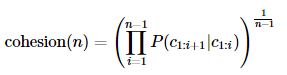

- '반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정
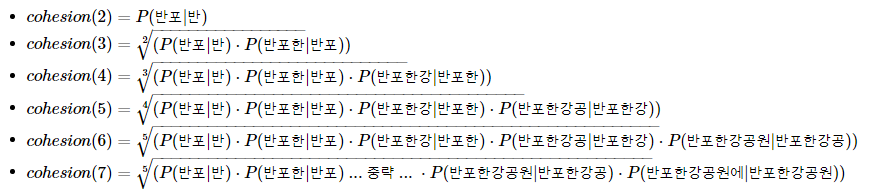

In [163]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [164]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [165]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [166]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [167]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

- 응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'임을 알수있음

#### (4) SOYNLP의 브랜칭 엔트로피(branching entropy)
- Branching Entropy: 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도
- 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보임

In [168]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [169]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [170]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [171]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

- '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0
- '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문에 값이 증가

#### (5) SOYNLP의 L tokenizer
- 한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많음
  - ex) 공원 + 에, 공부 + 하는
-  L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가짐

In [172]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

#### (6) 최대 점수 토크나이저
- **띄어쓰기가 되지 않는 문장**에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [173]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

### 4. SOYNLP를 이용한 반복되는 문자 정제
- ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요
- 반복되는 것은 하나로 정규화


In [174]:
from soynlp.normalizer import *

In [175]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [176]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


### 5. Customized KoNLPy

>형태소 분석 입력 : '은경이는 사무실로 갔습니다.'<br>
형태소 분석 결과 : ['은', '경이', '는', '사무실', '로', '갔습니다', '.']
- '은경이'가 아닌 '은','경이'로 나눠지는것을 해결하기 위해 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용

In [177]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

C:\Users\YOORA\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [178]:
# 은경이가 명사라는것을 알려주는 사전 추가
twitter.add_dictionary('은경이', 'Noun')

In [179]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']